# Project: Investigating a "no-show" cases for brazilian medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>***The data set:*** The "no-show" appointments dataset has the information from 100,000 medical appointments. This historical data ocurred in Brazil and it's main focus are on the questions around patients missing their appointment day

In [323]:
#packages import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from datetime import datetime
import matplotlib.ticker as mtick

#funcions definitions

def day_of_week(date, rtype="T"):
    #Identifies the day and your sequence on a week
    #    Args:
    #        param1: the date
    #        param2: the result type
    #    Returns:
    #      String the name of a day
    #      Integer the sequence on a week
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']    

    week_index = date.weekday() 
    week_day = days[week_index] 
    number_day = date.isoweekday()
    
    if rtype == 'T': 
        return week_day
    elif rtype == 'N':
        return number_day


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [324]:
#loading the data set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#verifying the data
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Some information about the data

> * _'ScheduledDay' tells us on what day the patient set up their appointment._
> * _'Neighborhood' indicates the location of the hospital._
> * _'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família._
> * Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [325]:
#Verifying the row and column numbers
df.shape

(110527, 14)

In [326]:
#Understand the basic statistics of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [327]:
#Understanding tue type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### At first sight, we can see on the data:
* 'PatientId': we don't need this data
* 'AppointmentID': we don't need this data
* 'Age': there is a at minimun one row with the value -1. Its a strange value for a age.
* 'No-show': the name of this feature inst on standars of the others features names
* 'ScheduledDay': it's better transform this data to a date-time value
* 'No-show': it's better transform this data to interger type in order to do a better analysis (correlating features)
* 'Hipertension' and 'Handcap': typo's

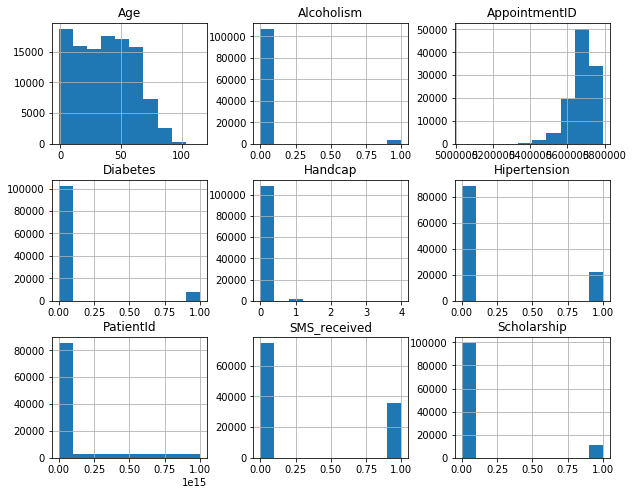

In [328]:
#Understanding the distrubution of the numeric data
df.hist(figsize=(10,8));

In [329]:
#checking for duplicate rows
print(df.duplicated().sum())

0


* the dataset has no duplicated rows

### Gender Feature Analysis

In [330]:
#checking the Gender consistency
df.query('Gender != "M" and Gender != "F"').Gender.count()

0

### Scheduled Day Feature Analysis

In [331]:
#in this case we want to conver to a date-time type
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'])

#Spliting the feature for futher analysis
df['ScheduledDay_Date'] = [d.date() for d in df['ScheduledDay']]

#Spliting the feature for futher analysis
df['ScheduledDay_Time'] = [d.time() for d in df['ScheduledDay']]

#Creating a new feature: finding the de day of week
df['ScheduledDay_DoW'] = df['ScheduledDay'].apply(day_of_week)


### Appointment Day Feature Analysis

In [332]:
#in this case we want to conver to a date-time type
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'])

#Spliting the feature for futher analysis
df['AppointmentDay_Date'] = [d.date() for d in df['AppointmentDay']]

#Spliting the feature for futher analysis
df['AppointmentDay_Time'] = [d.time() for d in df['AppointmentDay']]

#Creating a new feature: finding the de day of week
df['AppointmentDay_DoW'] = df['AppointmentDay'].apply(day_of_week)

In [333]:
#Creating a new feature: finding the de day of week
df['AppointmentScheduled_Date_Dif'] = df['AppointmentDay_Date'] - df['ScheduledDay_Date']
#
df['AppointmentScheduled_Date_Dif'] = df['AppointmentScheduled_Date_Dif'].astype('timedelta64[D]')
#
df['AppointmentScheduled_Date_Dif'] = df['AppointmentScheduled_Date_Dif'].astype(int)

#checking the Scholarship consistency
df.query('AppointmentScheduled_Date_Dif < 0').AppointmentScheduled_Date_Dif.count()

5

* There is some inconsistencies about the AppointmentScheduled_Date_Dif

### Scholarship Feature Analysis


In [334]:
#checking the Scholarship consistency
df.query('Scholarship != 1 and Scholarship != 0'  ).Scholarship.count()

0

### Hipertension Day Feature Analysis

In [335]:
#correcting the typo
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
#checking the Hypertension consistency
df.query('Hypertension != 1 and Hypertension != 0').Hypertension.count()

0

### Diabetes Feature Analysis

In [336]:
#checking the Diabetes consistency
df.query('Diabetes != 1 and Diabetes != 0'  ).Diabetes.count()

0

### Alcooholism Feature Analysis

In [337]:
#checking the Alcoholism consistency
df.query('Alcoholism != 1 and Alcoholism != 0'  ).Alcoholism.count()

0

### Handicap Feature Analysis

In [338]:
#correcting the typo
df.rename(columns = {'Handcap': 'Handicap'}, inplace = True)
#checking the Alcoholism consistency
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

### SMS Received Feature Analysis

In [339]:
#checking the SMS_received consistency
df.query('SMS_received != 1 and SMS_received != 0'  ).SMS_received.count()

0

### No show Feature Analysis

In [340]:
#changing the name of the column to became on standard
df.rename(columns={'No-show':'No_show'}, inplace=True)
#Mapping: 1 if the patient showed up to the appointment or 2 otherwise
df['No_show'].replace({'No':0,'Yes':1},inplace=True)
#checking the SMS_received consistency
df.query('No_show != "No" and No_show != "Yes"'  ).No_show.count()

110527

In [341]:
#reate a mask to better visualizing this feature
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

### Data Cleaning (Removing some outliers and dropping some columns that we dont needed for this analysis)

In [342]:
#removing some outliers on the feature Age
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 23)

In [343]:
#removing some outliers on the feature days to appointment
df = df[(df.AppointmentScheduled_Date_Dif  >= 0)] 
df.shape

(110475, 23)

In [344]:
#dropping some columns
df = df.drop(['PatientId','AppointmentID','AppointmentDay_Time'], 1)
df.shape

(110475, 20)

<a id='eda'></a>
## Exploratory Data Analysis

### General: No-show feature graph-analysis

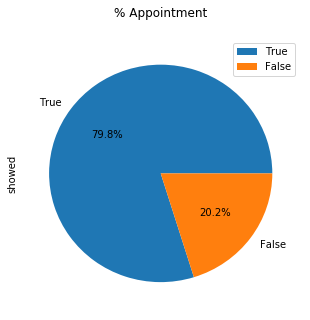

In [345]:
#generating the graph
showed_amount = df['showed'].value_counts()
pieChart = showed_amount.plot.pie(figsize=(5,5), autopct='%1.1f%%', fontsize = 10);
pieChart.set_title('% Appointment\n', fontsize = 12);
plt.legend();

_There is 20% of no show appointments_

### Research Question 1: Higher age are more likely to "no-show"?

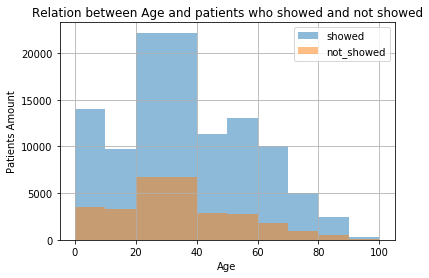

In [346]:
#generating the graph
df.Age[showed].hist(bins=[0, 10, 20, 20, 40, 50, 60, 70, 80, 90, 100], alpha=0.5, label='showed')
df.Age[not_showed].hist(bins=[0, 10, 20, 20, 40, 50, 60, 70, 80, 90, 100],alpha=0.5, label='not_showed');
plt.xlabel('Age')
plt.ylabel('Patients Amount')
plt.title('Relation between Age and patients who showed and not showed')
plt.legend();

_Apparently there is more "no- show" between ages 20-40 and less with ages 60-80_

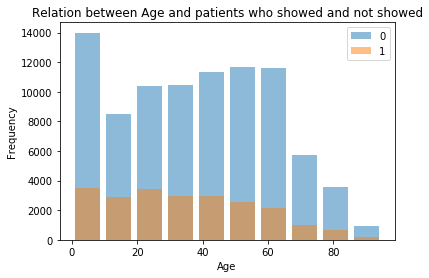

In [347]:
#generating the graph with a different perspective
df.groupby(['No_show'])['Age'].plot(kind='hist',rwidth=0.8, alpha=0.5)
plt.xlabel('Age')
plt.title('Relation between Age and patients who showed and not showed')
plt.legend();
plt.show()

_We can confirm in this graph: there is more "no- show" between ages 20-40 and less with ages 60-80_

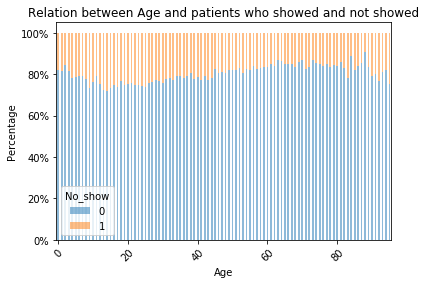

In [348]:
#Calculating proportionally
df.groupby(['Age','No_show']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True, alpha=0.5, fig=(60,48))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
years = list(range(0,100,20))
plt.xticks(years,[str(i) for i in years],rotation=45)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Relation between Age and patients who showed and not showed')
plt.show()

_We can confirm in this graph: there is more "no- show" between ages 20-40 and less with ages 60-80_


### Research Question 2: What's the day of the week with less no-show?

In [349]:
#creating a table
df.loc[:,['AppointmentDay_DoW','No_show','Age']].groupby(['AppointmentDay_DoW','No_show']).count()

Age
AppointmentDay_DoW No_show       
Friday             0        14971
                   1         4036
Monday             0        18018
                   1         4687
Saturday           0           30
                   1            9
Thursday           0        13903
                   1         3335
Tuesday            0        20481
                   1         5148
Wednesday          0        20765
                   1         5092

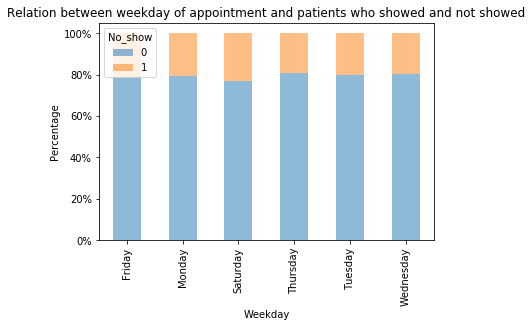

In [350]:
#calculating proportionally
df.groupby(['AppointmentDay_DoW','No_show']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True, alpha=0.5, fig=(20,16))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Weekday')
plt.ylabel('Percentage')
plt.title('Relation between weekday of appointment and patients who showed and not showed')
plt.show()


_At the weekends "no-show" is higher than at the weekdays (specialy at saturday)_

### Research Question 3 (The days amount from scheduled day until appointment day can interfere on the no-show?

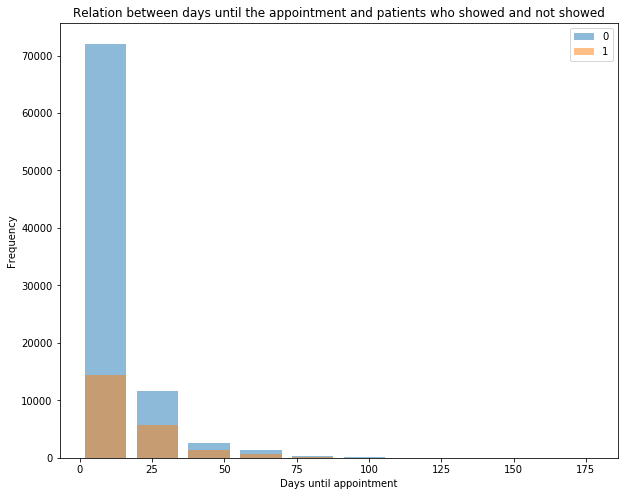

In [351]:
#building the graph
df.groupby(['No_show'])['AppointmentScheduled_Date_Dif'].plot(kind='hist',rwidth=0.8, alpha=0.5, figsize=(10,8))
plt.xlabel('Days until appointment')
plt.title('Relation between days until the appointment and patients who showed and not showed')
plt.legend();
plt.show()

_When the difference between the scheduled day and the appointment day are low the "no-show" is lower_

### Research Question 4  (Does the handicap influence the "no-show"?)

In [352]:
#age mean per handicap
df.groupby('Handicap').Age.mean()

Handicap
0    36.789995
1    50.657972
2    47.505495
3    48.615385
4    14.333333
Name: Age, dtype: float64

In [353]:
#generating a simple table
df.groupby(['No_show','Handicap'])['Handicap'].count()

No_show  Handicap
0        0           86340
         1            1671
         2             145
         3              10
         4               2
1        0           21905
         1             361
         2              37
         3               3
         4               1
Name: Handicap, dtype: int64

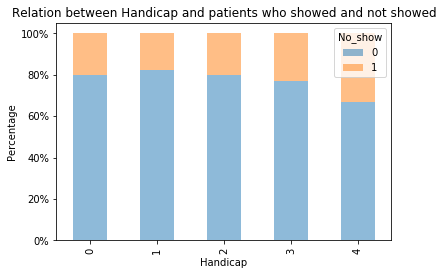

In [354]:
#calculating proportionally
df.groupby(['Handicap','No_show']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True, alpha=0.5, fig=(20,16))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Handicap')
plt.ylabel('Percentage')
plt.title('Relation between Handicap and patients who showed and not showed')

plt.show()

_Pacients with more handicap has more "no-show"_

### Research Question 5  (Who does not receive the SMS are more likely to "no-show "?)

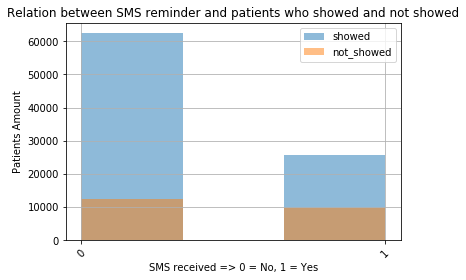

In [355]:
#building the graph
df.SMS_received[showed].hist(bins=3, alpha=0.5, label='showed')
df.SMS_received[not_showed].hist(bins=3, alpha=0.5, label='not_showed');
sms_received = (0,1)
plt.xticks(sms_received,[str(i) for i in sms_received],rotation=45)
plt.xlabel('SMS received => 0 = No, 1 = Yes')
plt.ylabel('Patients Amount')
plt.title('Relation between SMS reminder and patients who showed and not showed')
plt.legend();

_This is weird, but who does not receive SMS has less "no-show"_

### Research Question 6  (Who does have scholarship are more likely to "no-show "?)

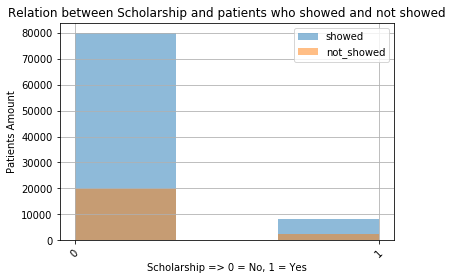

In [356]:
#building the graph
df.Scholarship[showed].hist(bins=3, alpha=0.5, label='showed')
df.Scholarship[not_showed].hist(bins=3, alpha=0.5, label='not_showed');
scholarship = (0,1)
plt.xticks(scholarship,[str(i) for i in scholarship],rotation=45)
plt.xlabel('Scholarship => 0 = No, 1 = Yes')
plt.ylabel('Patients Amount')
plt.title('Relation between Scholarship and patients who showed and not showed')
plt.legend();

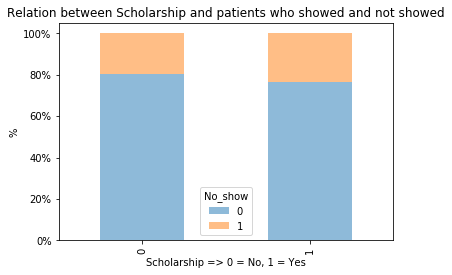

In [357]:
#calculating proportionally
df.groupby(['Scholarship','No_show']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True, alpha=0.5, fig=(20,16))
plt.xlabel('Scholarship => 0 = No, 1 = Yes')
plt.ylabel('%')
plt.title('Relation between Scholarship and patients who showed and not showed')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

_Pacients with scholarship are a little bit more likely to "no-show" than pacients without scholarship_

<a id='conclusions'></a>
## Conclusions

> * There is 20% of no show appointments
> * There is more "no-show" between ages 20-40 and less with ages 60-80
> * At the weekends "no-show" are higher than at the weekdays (specialy at saturday)
> * When the difference between the scheduled day and the appointment day are low the "no-show" is lower
> * Pacients with more handicap has more "no-show
> * When patients has scholarship, they has a little bit "no-show" than pacients without scholarship

> **Limitations**: there are few features on the data set, is not clear how widely the data set are (if it's a random sample from some city for instance), the feature AppointmentDate has no hour data, and some outliers appeared on (negative age for instance) 